In [5]:
# https://qutip.org/docs/3.1.0/guide/guide-visualization.html
# https://arxiv.org/pdf/2012.02185

from qutip import *
import numpy as np

# list of Ns from 20 to 1
N = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
alpha = [np.sqrt(2), 0.5, 1, 2, 3, 4, 5, 6, 7, 8]
n = [1, 2, 3, 4, 5, 6, 7, 8]
density = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

rho_coherent = coherent_dm(N[0], alpha[0])
rho_thermal = thermal_dm(N[0], n[0])
rho_fock = fock_dm(N[0], n[0])
rho_random = rand_dm(N[0], density[0])
rho_num = num(N[0])
rho_cat = coherent(N[0], alpha[0]) + coherent(N[0], -alpha[0]) 

# image, type, prompt, ground_truth
# image1.png, coherent, (llm_generated_prompt), This is a coherent state with alpha equal to sqrt(2) and  number of qubitsequal to 20 in the linear space -5 to 5
# image2.png, thermal, (llm_generated_prompt), This is a coherent state with expectation value equal to 2 and number of qubits equal to 20 in the linear space -5 to 5 

# 780 -> linspace 1
# 780 -> linspace 2


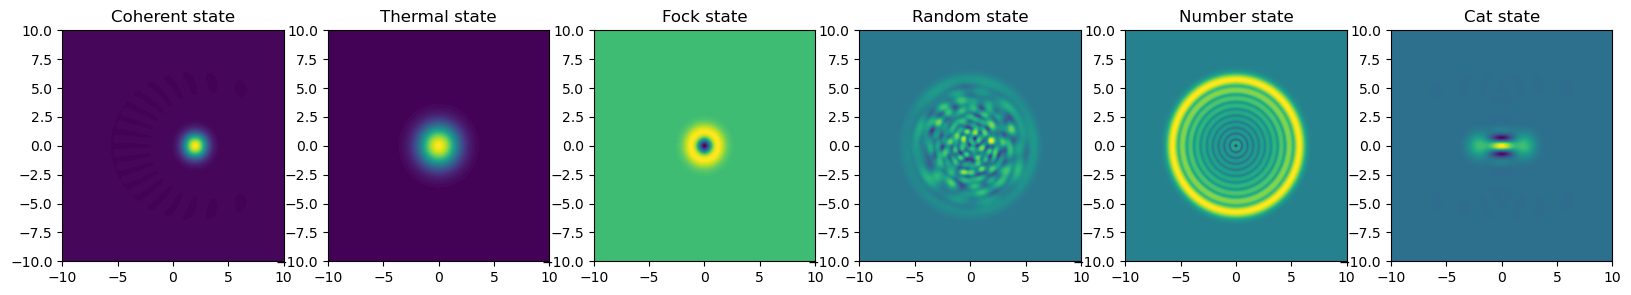

In [6]:
from matplotlib import pyplot as plt

lin_space = [np.linspace(-5,5,200), np.linspace(-10,10,200)]
xvec = lin_space[1]
W_coherent = wigner(rho_coherent, xvec, xvec)
W_thermal = wigner(rho_thermal, xvec, xvec)
W_fock = wigner(rho_fock, xvec, xvec)
W_random = wigner(rho_random, xvec, xvec)
W_num = wigner(rho_num, xvec, xvec)
W_cat = wigner(rho_cat, xvec, xvec)

# plot the results
fig, axes = plt.subplots(1, 6, figsize=(20,3))
cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)
lbl2 = axes[2].set_title("Fock state")
cont3 = axes[3].contourf(xvec, xvec, W_random, 100)
lbl3 = axes[3].set_title("Random state")
cont4 = axes[4].contourf(xvec, xvec, W_num, 100)
lbl4 = axes[4].set_title("Number state")
cont5 = axes[5].contourf(xvec, xvec, W_cat, 100)
lbl5 = axes[5].set_title("Cat state")
plt.show()

In [ ]:
from qutip import *
import numpy as np

# list of Ns from 20 to 1
N = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
alpha = [np.sqrt(2), 0.5, 1, 2, 3, 4, 5, 6, 7, 8]
n = [1, 2, 3, 4, 5, 6, 7, 8]
desity = [np.sqrt(2), 0.5, 1, 2, 3, 4, 5, 6, 7, 8]

rho_coherent = coherent_dm(N[0], alpha[0])
rho_thermal = thermal_dm(N[0], n[0])
rho_fock = fock_dm(N[0], n[0])
rho_random = rand_dm(N[0], [0])
rho_num = num(N[0])
rho_cat = coherent(N[0], alpha[0]) + coherent(N[0], -alpha[0]) 

In [ ]:
import numpy as np
import pandas as pd
import os
from qutip import *
from matplotlib import pyplot as plt
import time

# Create output directories
output_dir = "generated_images_qutip"
os.makedirs(output_dir, exist_ok=True)

# Parameters
N_values = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
alpha_values = [np.sqrt(2), 0.5, 1, 2, 3, 4, 5, 6, 7, 8]
n_values = [1, 2, 3, 4, 5, 6, 7, 8]
density_values = [np.sqrt(2), 0.5, 1, 2, 3, 4, 5, 6, 7, 8]

# Define linear spaces
lin_space = [np.linspace(-5,5,200), np.linspace(-10,10,200)]
xvec = lin_space[0]

# Data storage
data = []

# Generate images
counter = 0
for N in N_values:
    for alpha in alpha_values:
        for n in n_values:
            for density in density_values:
                rho_coherent = coherent_dm(N, alpha)
                rho_thermal = thermal_dm(N, n)
                rho_fock = fock_dm(N, n)
                rho_random = rand_dm(N, [0])
                rho_num = num(N)
                rho_cat = (coherent(N, alpha) + coherent(N, -alpha)).unit()
                
                states = {
                    "Coherent state": rho_coherent,
                    "Thermal state": rho_thermal,
                    "Fock state": rho_fock,
                    "Random state": rho_random,
                    "Number state": rho_num,
                    "Cat state": rho_cat,
                }
                
                for state_name, rho in states.items():
                    W = wigner(rho, xvec, xvec)
                    
                    fig, ax = plt.subplots(figsize=(4, 4))
                    cont = ax.contourf(xvec, xvec, W, 100)
                    ax.set_title(state_name)
                    
                    image_path = os.path.join(output_dir, f"{state_name.replace(' ', '_')}_N{N}_alpha{alpha}_n{n}_density{density}.png")
                    plt.savefig(image_path)
                    plt.close(fig)
                    
                    ground_truth = f"This is a {state_name.lower()} with alpha equal to {alpha}, number of qubits equal to {N}, n equal to {n}, and density equal to {density} in the linear space -5 to 5."
                    data.append([image_path, state_name, "", ground_truth])
                    
                counter += 1
                
                if counter % 10 == 0:
                    # sleep execution for 1 second
                    time.sleep(1)

# Save metadata to CSV
df = pd.DataFrame(data, columns=["image", "type", "prompt", "ground_truth"])
df.to_csv("metadata-qutip.csv", index=False)

print("Image generation and metadata saving completed.")
